<a href="https://colab.research.google.com/github/eun-88/DataScientist_07/blob/main/%EC%95%8C%EC%B9%98%EA%B0%88%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install arch yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 13.6 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              005930.KS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1059.56
Distribution:                  Normal   AIC:                           2127.13
Method:            Maximum Likelihood   BIC:                           2143.90
                                        No. Observations:                  490
Date:                Fri, Jan 09 2026   Df Residuals:                      489
Time:                        07:30:46   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1360  9.303e-02      1.461      0.144 [-4.63

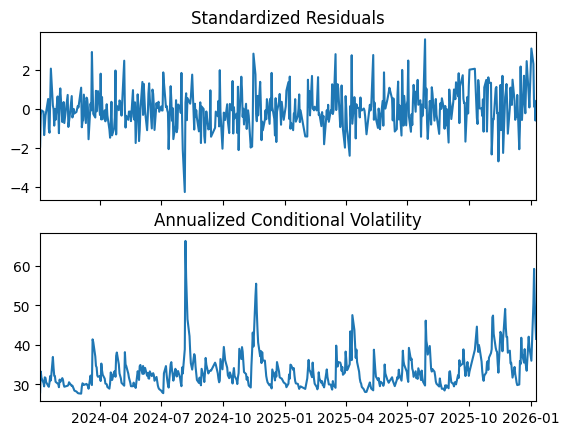

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 (삼성전자)
# auto_adjust=True를 넣으면 'Close'가 곧 수정 종가가 됩니다.
data = yf.download('005930.KS', start='2024-01-01', auto_adjust=True)

# 데이터가 잘 들어왔는지 확인하고 'Close' 열을 사용합니다.
returns = 100 * data['Close'].pct_change().dropna()

# 2. 갈치(GARCH) 모델 설정 및 학습
# p=1, q=1은 가장 표준적인 설정입니다.
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fitted = model.fit(disp='off')

# 3. 모델 결과 요약 출력
print(model_fitted.summary())

# 4. 시각화 (변동성 예측 그래프)
# 모델이 계산한 '조건부 분산'을 그래프로 그립니다.
fig = model_fitted.plot(annualize='D')
plt.show()